In [1]:
import os 
import zipfile
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt
import shutil

## Data Extraction

In [2]:
# Paths to the zip files
zip_files = {
    'Dataset-zip/annotation.zip': './Dataset-org/annotation',
    'Dataset-zip/images.zip': './Dataset-org/images'
}

# Create necessary directories and extract files
for zip_file_path, target_folder in zip_files.items():
    # Create the target folder if it doesn't exist
    os.makedirs(target_folder, exist_ok=True)
    
    # Extract the files
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(target_folder)
        print(f"Extracted {zip_file_path} to {target_folder}")

print("All files extracted successfully.")

Extracted Dataset-zip/annotation.zip to ./Dataset-org/annotation
Extracted Dataset-zip/images.zip to ./Dataset-org/images
All files extracted successfully.


## Data Preprocessing
### Correction of path Tag on Annotation files

In [3]:
# Base directory containing annotation folders
annotation_dir = './Dataset-org/annotation'

# New base path to replace the <path> tag
new_base_path = r'D:\AI Client project PR-0019\Dataset-org\images\content\images'

# Iterate through all folders and XML files in the annotation directory
for root, _, files in os.walk(annotation_dir):
    for file in files:
        if file.endswith('.xml'):  # Process only XML files
            xml_file_path = os.path.join(root, file)

            try:
                # Parse the XML file
                tree = ET.parse(xml_file_path)
                root_element = tree.getroot()

                # Find and update the <path> tag
                for path_tag in root_element.iter('path'):
                    # Extract the file name from the existing path
                    file_name = os.path.basename(path_tag.text)
                    # Create the new path
                    new_path = os.path.join(new_base_path, file_name)
                    # Update the <path> tag
                    path_tag.text = new_path

                # Save the updated XML file
                tree.write(xml_file_path, encoding='utf-8', xml_declaration=True)

            except ET.ParseError:
                print(f"Skipping malformed or empty XML file: {xml_file_path}")
            except Exception as e:
                print(f"Error processing file {xml_file_path}: {e}")

print("Processing complete.")

Processing complete.


### Total Annotations And Images

In [4]:
# Paths
annotation_dir = './Dataset-org/annotation'
images_dir = './Dataset-org/images/content/images'

def count_files(directory):
    total_files = 0
    for root, _, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Count files in annotation and images directories
annotation_file_count = count_files(annotation_dir)
images_file_count = count_files(images_dir)

print(f"Total files in 'annotation': {annotation_file_count}")
print(f"Total files in 'images': {images_file_count}")

Total files in 'annotation': 2122
Total files in 'images': 1933


### Extra Annotation And Images Are Removed

In [ ]:
# Paths to annotation and images directories
annotation_dir = Path('./Dataset-org/annotation')
images_dir = Path('./Dataset-org/images/content/images')

# Collect all image and annotation file names (without extensions)
image_files = set(f.stem for f in images_dir.rglob('*') if f.is_file())
annotation_files = set(f.stem for f in annotation_dir.rglob('*.xml') if f.is_file())

# Find files that are not matched (extra files)
extra_annotations = annotation_files - image_files  # Annotations without corresponding images
extra_images = image_files - annotation_files      # Images without corresponding annotations

# Collect the files to delete
files_to_delete = []

# Delete extra annotation files (those that don't have a corresponding image)
for annotation_file in annotation_dir.rglob('*.xml'):
    if annotation_file.stem in extra_annotations:
        print(f"Deleting extra annotation: {annotation_file}")
        files_to_delete.append(str(annotation_file))
        annotation_file.unlink()  # Delete the file

# Delete extra image files (those that don't have a corresponding annotation)
for image_file in images_dir.rglob('*.*'):
    if image_file.stem in extra_images:
        print(f"Deleting extra image: {image_file}")
        files_to_delete.append(str(image_file))
        image_file.unlink()  # Delete the file

# Log deleted files (optional)
with open('deleted_files.log', 'w') as log_file:
    log_file.write('\n'.join(files_to_delete))

print(f"Deleted {len(files_to_delete)} extra files (images and annotations).")


Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01867-1.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01867-2.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01867-3.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01867-4.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01872-2.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01872-3.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01873-1.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01873-2.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01873-3.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01875-1.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01875-2.xml
Deleting extra annotation: Dataset-org\annotation\asiatic rice borer\01875-3.xml
Deleting extra annotation: D

In [7]:
# Paths
annotation_dir = './Dataset-org/annotation'
images_dir = './Dataset-org/images/content/images'

def count_files(directory):
    total_files = 0
    for root, _, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Count files in annotation and images directories
annotation_file_count = count_files(annotation_dir)
images_file_count = count_files(images_dir)

print(f"Total files in 'annotation': {annotation_file_count}")
print(f"Total files in 'images': {images_file_count}")

Total files in 'annotation': 1915
Total files in 'images': 1915


### Correction Of name Tag Details On Annotation Files 

In [ ]:
# Paths
annotation_dir = './Dataset-org/annotation'

# Class mapping based on subdirectory names
class_mapping = {
    "asiatic rice borer": 1,
    "paddy stem maggot": 2,
    "rice gall midge": 3,
    "rice leaf caterpillar": 4,
    "rice leaf roller": 5,
    "small brown plant hopper": 6,
    "wheat blossom midge": 7,
    "wheat phloeothrips": 8,
    "wheat sawfly": 9,
    "white backed plant hopper": 10,
    "yellow rice borer": 11
}

# Update annotations
def update_annotations(annotation_dir):
    for class_name in os.listdir(annotation_dir):
        class_path = os.path.join(annotation_dir, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                if file.endswith(".xml"):
                    file_path = os.path.join(class_path, file)
                    try:
                        # Parse XML
                        tree = ET.parse(file_path)
                        root = tree.getroot()

                        # Update or add <name> tag
                        updated = False
                        for obj in root.findall("object"):
                            name_tag = obj.find("name")
                            if name_tag is None:
                                # Add <name> tag if missing
                                name_tag = ET.SubElement(obj, "name")
                                updated = True
                            # Update <name> with the correct class name
                            if name_tag.text != class_name:
                                name_tag.text = class_name
                                updated = True

                        # Save the updated XML file
                        if updated:
                            tree.write(file_path)
                    except ET.ParseError:
                        print(f"Invalid XML file skipped: {file_path}")

# updating annotation
update_annotations(annotation_dir)
print("update on annotation files name tag is done")

update on annotation files name tag is done


## Visualization 

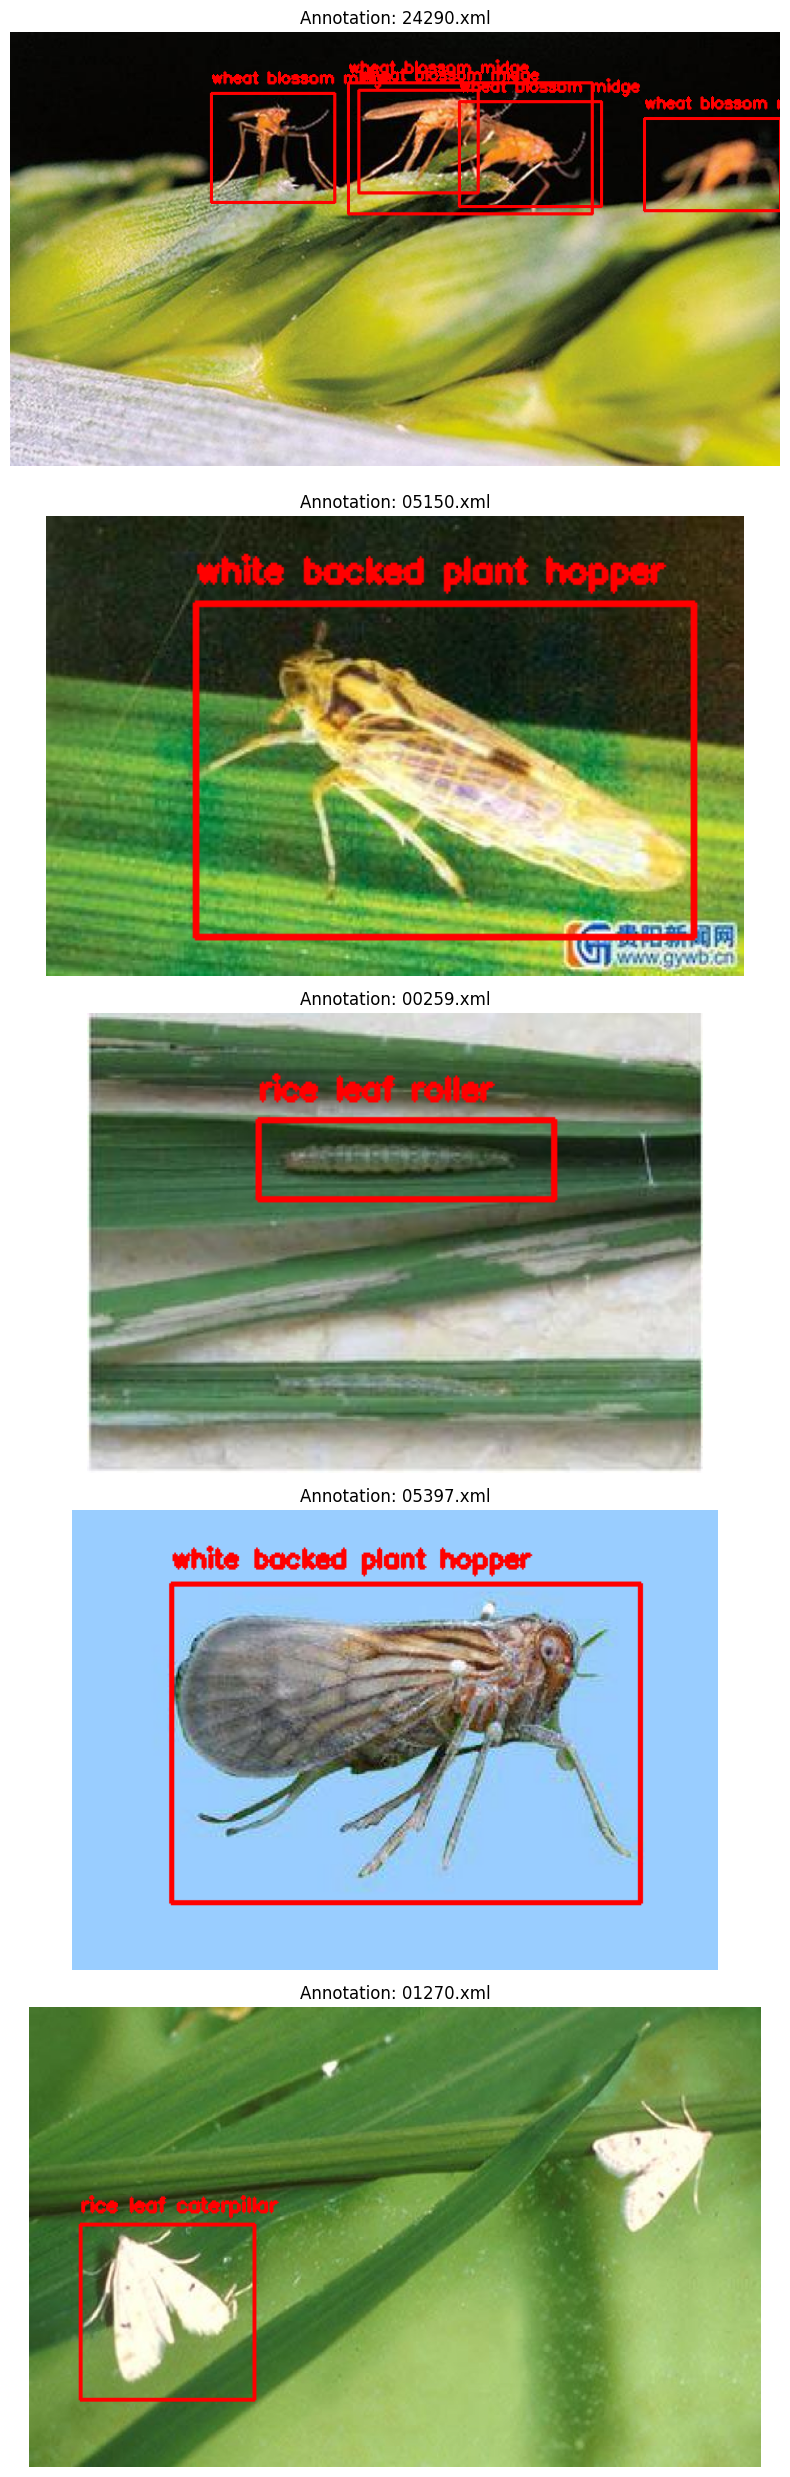

In [13]:
# Paths
annotation_folder = './Dataset-org/annotation'
image_folder = './Dataset-org/images/content/images'

def visualize_random_annotations(annotation_folder, image_folder, num_images=5):
    # Get all XML files
    xml_files = []
    for root, _, files in os.walk(annotation_folder):
        for file in files:
            if file.endswith('.xml'):
                xml_files.append(os.path.join(root, file))

    # Randomly select XML files
    selected_files = random.sample(xml_files, min(num_images, len(xml_files)))

    # Create a figure for displaying images vertically
    fig, axes = plt.subplots(len(selected_files), 1, figsize=(8, 5 * len(selected_files)))

    if len(selected_files) == 1:
        axes = [axes]  # Ensure axes is iterable for a single image

    for i, xml_file in enumerate(selected_files):
        # Parse the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Get image file name
        filename = root.find('filename').text
        image_path = os.path.join(image_folder, filename)

        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Image not found: {image_path}")
            continue

        # Convert BGR (OpenCV) to RGB (Matplotlib)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            # Draw the bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
            # Put label text
            cv2.putText(image, name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Display the image with annotations
        axes[i].imshow(image)
        axes[i].set_title(f"Annotation: {os.path.basename(xml_file)}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize 5 random annotated images
visualize_random_annotations(annotation_folder, image_folder, num_images=5)


## Creation Of Masks For Entire Dataset

In [14]:
# Paths
annotation_dir = './Dataset-org/annotation'
images_dir = './Dataset-org/images/content/images'
masks_dir = './Dataset-org/masks'  # Directory to save generated masks
os.makedirs(masks_dir, exist_ok=True)


def create_mask(image_path, annotation_path, mask_path, class_mapping):
    # Read the image to get dimensions
    image = cv2.imread(image_path)
    if image is None:
        print(f"Unable to read image: {image_path}")
        return
    height, width = image.shape[:2]

    # Create an empty mask
    mask = np.zeros((height, width), dtype=np.uint8)

    try:
        # Parse annotation XML
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        annotations_found = False  # Flag to check if any annotations were processed

        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name in class_mapping:
                class_id = class_mapping[class_name]
                bbox = obj.find("bndbox")
                xmin = int(bbox.find("xmin").text)
                ymin = int(bbox.find("ymin").text)
                xmax = int(bbox.find("xmax").text)
                ymax = int(bbox.find("ymax").text)

                # Draw rectangle on mask
                cv2.rectangle(mask, (xmin, ymin), (xmax, ymax), class_id, -1)  # Fill rectangle with class_id
                annotations_found = True

        if not annotations_found:
            print(f"No annotations found in {annotation_path}")

    except ET.ParseError:
        print(f"Invalid XML file: {annotation_path}")
        return

    # Save the mask
    os.makedirs(os.path.dirname(mask_path), exist_ok=True)
    cv2.imwrite(mask_path, mask)

# Process all images and annotations
for class_dir in os.listdir(annotation_dir):
    class_annotation_dir = os.path.join(annotation_dir, class_dir)
    if os.path.isdir(class_annotation_dir):
        class_image_dir = os.path.join(masks_dir, class_dir)
        os.makedirs(class_image_dir, exist_ok=True)

        for annotation_file in os.listdir(class_annotation_dir):
            annotation_path = os.path.join(class_annotation_dir, annotation_file)
            image_name = annotation_file.replace(".xml", ".jpg")
            image_path = os.path.join(images_dir, image_name)
            mask_path = os.path.join(class_image_dir, annotation_file.replace(".xml", ".png"))


            # Check if files exist
            if not os.path.exists(annotation_path):
                print(f"Annotation file not found: {annotation_path}")
                continue

            if not os.path.exists(image_path):
                print(f"Image file not found: {image_path}")
                continue

            # Create mask
            create_mask(image_path, annotation_path, mask_path, class_mapping)
            
print("masks generated")

masks generated


## Visualization Of A Mask And Related Image

Loaded image from ./Dataset-org/images/content/images/01871.jpg
Loaded mask from ./Dataset-org/masks/asiatic rice borer/01871.png


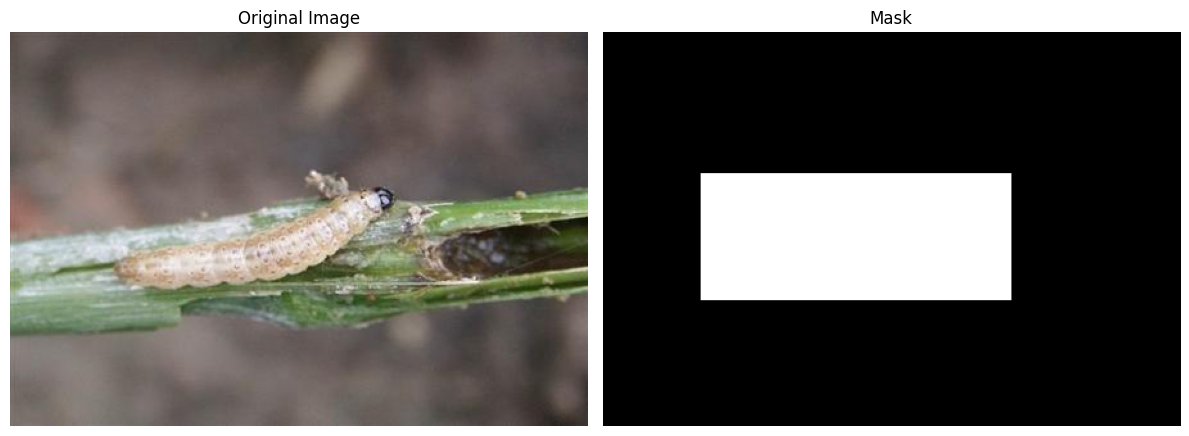

In [22]:
# Paths for the image and mask
image_path = './Dataset-org/images/content/images/01871.jpg'  
mask_path = './Dataset-org/masks/asiatic rice borer/01871.png' 

# Read the image and mask
image = cv2.imread(image_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale

# Check if the image and mask are loaded correctly
if image is None:
    print(f"Error loading image from {image_path}")
else:
    print(f"Loaded image from {image_path}")

if mask is None:
    print(f"Error loading mask from {mask_path}")
else:
    print(f"Loaded mask from {mask_path}")

# Convert BGR (OpenCV) to RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize the image and mask side by side
plt.figure(figsize=(12, 6))

# Plot the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')  # Hide axis

# Plot the mask on the right
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

## Train, Test And Validation Split

In [10]:
# Paths
base_dir = './Dataset-org'
images_dir = os.path.join(base_dir, 'images', 'content', 'images')  # Path to images
masks_dir = os.path.join(base_dir, 'masks')
annotations_dir = os.path.join(base_dir, 'annotation')

output_base_dir = './Dataset-split'
output_images_dir = os.path.join(output_base_dir, 'images')
output_masks_dir = os.path.join(output_base_dir, 'masks')
output_annotations_dir = os.path.join(output_base_dir, 'annotations')

# Create output directories for each split
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_images_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_masks_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_annotations_dir, split), exist_ok=True)

# Collect image, mask, and annotation paths
dataset = []

# Iterate through the annotation directory and match the class with images
for class_name in os.listdir(annotations_dir):
    annotation_class_dir = os.path.join(annotations_dir, class_name)
    mask_class_dir = os.path.join(masks_dir, class_name)

    if not os.path.isdir(annotation_class_dir) or not os.path.isdir(mask_class_dir):
        continue  # Skip if not a directory

    # Get all annotation files in the class directory
    for annotation_file in os.listdir(annotation_class_dir):
        if annotation_file.endswith('.xml'):
            base_name = os.path.splitext(annotation_file)[0]  # Get the file name without extension
            image_file = f"{base_name}.jpg"
            mask_file = f"{base_name}.png"

            # Paths to the image, mask, and annotation
            image_path = os.path.join(images_dir, image_file)
            mask_path = os.path.join(mask_class_dir, mask_file)
            annotation_path = os.path.join(annotation_class_dir, annotation_file)

            # Ensure all files exist
            if os.path.exists(image_path) and os.path.exists(mask_path) and os.path.exists(annotation_path):
                dataset.append((image_path, mask_path, annotation_path, class_name))

# Split dataset into train, val, and test by class
train_data, temp_data = train_test_split(dataset, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Helper function to copy files
def copy_files(data, split):
    for image_path, mask_path, annotation_path, class_name in data:
        # Create subdirectory for the class in the split (train, val, test)
        class_image_dir = os.path.join(output_images_dir, split, class_name)
        os.makedirs(class_image_dir, exist_ok=True)

        # Copy image
        dst_image = os.path.join(class_image_dir, os.path.basename(image_path))
        shutil.copy(image_path, dst_image)

        # Copy mask
        dst_mask = os.path.join(output_masks_dir, split, class_name, os.path.basename(mask_path))
        os.makedirs(os.path.dirname(dst_mask), exist_ok=True)
        shutil.copy(mask_path, dst_mask)

        # Copy annotation
        dst_annotation = os.path.join(output_annotations_dir, split, class_name, os.path.basename(annotation_path))
        os.makedirs(os.path.dirname(dst_annotation), exist_ok=True)
        shutil.copy(annotation_path, dst_annotation)

# Copy files for each split (train, val, test)
copy_files(train_data, 'train')
copy_files(val_data, 'val')
copy_files(test_data, 'test')

print("Dataset split completed with class-based subdirectories for images")

Dataset split completed with class-based subdirectories for images


## Bounding Box Creation and Data Pipeline

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf

def extract_bounding_box_from_mask(mask):
    """
    Extract the bounding box from a binary mask.

    Args:
        mask (numpy array): The binary mask.

    Returns:
        tuple: Bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour (the object)
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming the largest contour is the object
        return (x / mask.shape[1], y / mask.shape[0], (x + w) / mask.shape[1], (y + h) / mask.shape[0])
    else:
        return None  # No object found

def localization_classification_generator_with_masks(
    image_dir, mask_dir, batch_size, image_size, num_classes
):
    """
    Generator for localization and classification using masks.

    Args:
        image_dir (str): Path to the directory containing image class subdirectories.
        mask_dir (str): Path to the directory containing masks corresponding to images.
        batch_size (int): Number of samples per batch.
        image_size (tuple): Target size for images (height, width).
        num_classes (int): Number of classes for classification.

    Yields:
        tuple: A batch of images, bounding boxes, and classification labels.
    """
    # Collect image paths and corresponding class labels
    image_paths = []
    labels = []

    class_names = sorted(os.listdir(image_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            mask_path = os.path.join(mask_dir, class_name, image_name.replace(".jpg", ".png"))
            if os.path.isfile(image_path) and os.path.isfile(mask_path):
                image_paths.append(image_path)
                labels.append(class_to_index[class_name])
            else:
                print(f"Skipping invalid pair: {image_path}, {mask_path}")

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_bboxes = []
            batch_labels = []

            for j in range(i, min(i + batch_size, len(image_paths))):
                # Load and preprocess image
                image = cv2.imread(image_paths[j])
                if image is None:
                    print(f"Skipping invalid image: {image_paths[j]}")
                    continue
                image = cv2.resize(image, image_size)
                image = image / 255.0  # Normalize to [0, 1]
                batch_images.append(image)

                # Load mask and extract bounding box
                mask_path = os.path.join(mask_dir, image_paths[j].split(os.sep)[-2], 
                                         image_paths[j].split(os.sep)[-1].replace(".jpg", ".png"))
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Skipping invalid mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox is None:
                    print(f"No object found in mask: {mask_path}")
                    continue
                batch_bboxes.append(bbox)

                # One-hot encode labels
                label = tf.keras.utils.to_categorical(labels[j], num_classes=num_classes)
                batch_labels.append(label)

            if len(batch_images) > 0:
                yield (
                    np.array(batch_images),  # Input images
                    {
                        "localization_output": np.array(batch_bboxes),  # Bounding boxes
                        "classification_output": np.array(batch_labels),  # Class labels
                    },
                )


In [3]:
train_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/train",
    mask_dir="./Dataset-split/masks/train",
    batch_size=64,
    image_size=(224, 224),
    num_classes=12
)

val_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/val",
    mask_dir="./Dataset-split/masks/val",
    batch_size=64,
    image_size=(224, 224),
    num_classes=12
)

## MobileNetV2 model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Input shape for the model
input_shape = (224, 224, 3)
num_classes = 12  
# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# MobileNetV2 Base Model
MobileNetV2_base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3), input_tensor=input_layer)
MobileNetV2_base.trainable = False #Freeze the layers

for layer in MobileNetV2_base.layers[:5]:
    layer.trainable = True

for layer in MobileNetV2_base.layers[:-10]:
    layer.trainable = True

# Apply Global Average Pooling
x = MobileNetV2_base.output
x = GlobalAveragePooling2D()(x)

# Classification Branch
classification_branch = Dropout(0.5)(x)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dropout(0.4)(x)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Define the model with two outputs: one for classification and one for localization
model = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Mean Squared Error for bounding box regression
        "classification_output": "categorical_crossentropy",  # Cross-entropy for classification
    },
    metrics={
        "localization_output": "mae",  # Mean Absolute Error for bounding box regression
        "classification_output": "accuracy",  # Accuracy for classification
    },
)

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,278,480 (8.69 MB)

 Trainable params: 1,511,888 (5.77 MB)

 Non-trainable params: 766,592 (2.92 MB)

In [5]:
import os

# Count the number of images in the training and validation directories
train_image_paths = []
for class_name in os.listdir("./Dataset-split/images/train"):
    class_dir = os.path.join("./Dataset-split/images/train", class_name)
    if os.path.isdir(class_dir):
        train_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

val_image_paths = []
for class_name in os.listdir("./Dataset-split/images/val"):
    class_dir = os.path.join("./Dataset-split/images/val", class_name)
    if os.path.isdir(class_dir):
        val_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

# Assign the number of samples to the annotations
train_annotations = len(train_image_paths)
val_annotations = len(val_image_paths)

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="MobileNetV2_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [7]:
# Train the model
history = model.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - classification_output_accuracy: 0.0559 - classification_output_loss: 2.9086 - localization_output_loss: 0.0753 - localization_output_mae: 0.2245 - loss: 2.9842 
Epoch 1: val_loss improved from inf to 2.46625, saving model to MobileNetV2_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 1285s 30s/step - classification_output_accuracy: 0.0556 - classification_output_loss: 2.9033 - localization_output_loss: 0.0754 - localization_output_mae: 0.2248 - loss: 2.9790 - val_classification_output_accuracy: 0.1169 - val_classification_output_loss: 2.4453 - val_localization_output_loss: 0.0342 - val_localization_output_mae: 0.1495 - val_loss: 2.4662 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 30s/step - classification_output_accuracy: 0.0559 - classification_output_loss: 2.4954 - localization_output_loss: 0.0510 - localization_output_mae: 0.1884 - loss: 2.5469 
Epoch 2: val_loss did not improve from 2.46625
41/41 ━━━━━━━━━━━━━━━━━━━━ 12

## Testing MobileNetV2 model

In [8]:
test_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/test",
    mask_dir="./Dataset-split/masks/test",
    batch_size=64,
    image_size=(224, 224),
    num_classes=12
)

In [10]:
# evaluate test data
results = model.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - classification_output_accuracy: 0.0838 - classification_output_loss: 2.4856 - localization_output_loss: 0.0390 - localization_output_mae: 0.1604 - loss: 2.5137
Test Results:
Localization Loss: 2.511409282684326
Classification Loss: 0.03892611339688301
Localization MAE: 2.4835362434387207
Classification Accuracy: 0.08630087226629257


## Data Pipeline for InceptionV3

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf

def extract_bounding_box_from_mask(mask):
    """
    Extract the bounding box from a binary mask.

    Args:
        mask (numpy array): The binary mask.

    Returns:
        tuple: Bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour (the object)
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming the largest contour is the object
        return (x / mask.shape[1], y / mask.shape[0], (x + w) / mask.shape[1], (y + h) / mask.shape[0])
    else:
        return None  # No object found

def localization_classification_generator_with_masks(
    image_dir, mask_dir, batch_size, image_size, num_classes
):
    """
    Generator for localization and classification using masks.

    Args:
        image_dir (str): Path to the directory containing image class subdirectories.
        mask_dir (str): Path to the directory containing masks corresponding to images.
        batch_size (int): Number of samples per batch.
        image_size (tuple): Target size for images (height, width).
        num_classes (int): Number of classes for classification.

    Yields:
        tuple: A batch of images, bounding boxes, and classification labels.
    """
    # Collect image paths and corresponding class labels
    image_paths = []
    labels = []

    class_names = sorted(os.listdir(image_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            mask_path = os.path.join(mask_dir, class_name, image_name.replace(".jpg", ".png"))
            if os.path.isfile(image_path) and os.path.isfile(mask_path):
                image_paths.append(image_path)
                labels.append(class_to_index[class_name])
            else:
                print(f"Skipping invalid pair: {image_path}, {mask_path}")

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_bboxes = []
            batch_labels = []

            for j in range(i, min(i + batch_size, len(image_paths))):
                # Load and preprocess image
                image = cv2.imread(image_paths[j])
                if image is None:
                    print(f"Skipping invalid image: {image_paths[j]}")
                    continue
                image = cv2.resize(image, image_size)
                image = (image / 127.5) - 1.0  # Normalize to [-1, 1]
                batch_images.append(image)

                # Load mask and extract bounding box
                mask_path = os.path.join(mask_dir, image_paths[j].split(os.sep)[-2], 
                                         image_paths[j].split(os.sep)[-1].replace(".jpg", ".png"))
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Skipping invalid mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox is None:
                    print(f"No object found in mask: {mask_path}")
                    continue
                batch_bboxes.append(bbox)

                # One-hot encode labels
                label = tf.keras.utils.to_categorical(labels[j], num_classes=num_classes)
                batch_labels.append(label)

            if len(batch_images) > 0:
                yield (
                    np.array(batch_images),  # Input images
                    {
                        "localization_output": np.array(batch_bboxes),  # Bounding boxes
                        "classification_output": np.array(batch_labels),  # Class labels
                    },
                )


In [3]:
train_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/train",
    mask_dir="./Dataset-split/masks/train",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

val_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/val",
    mask_dir="./Dataset-split/masks/val",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

## InceptionV3 model

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Input shape for the model
input_shape = (256, 256, 3)
num_classes = 12

# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# InceptionV3 Base Model
InceptionV3_base = InceptionV3(weights="imagenet", include_top=False, input_shape=(256, 256, 3), input_tensor=input_layer)
InceptionV3_base.trainable = False #Freeze the layers

# Apply Global Average Pooling
x = InceptionV3_base.output
x = Conv2D(1024, (3,3), activation= 'relu', padding= 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size= (2,2))(x)
x = GlobalAveragePooling2D()(x)

# Classification Branch
classification_branch = Dropout(0.5)(x)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dropout(0.4)(x)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Define the model with two outputs: one for classification and one for localization
model1 = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model1.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Mean Squared Error for bounding box regression
        "classification_output": "categorical_crossentropy",  # Cross-entropy for classification
    },
    metrics={
        "localization_output": "mae",  # Mean Absolute Error for bounding box regression
        "classification_output": "accuracy",  # Accuracy for classification
    },
)

# Print the model summary
model1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 40,698,672 (155.25 MB)

 Trainable params: 18,893,840 (72.07 MB)

 Non-trainable params: 21,804,832 (83.18 MB)

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="InceptionV3_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [6]:
import os

# Count the number of images in the training and validation directories
train_image_paths = []
for class_name in os.listdir("./Dataset-split/images/train"):
    class_dir = os.path.join("./Dataset-split/images/train", class_name)
    if os.path.isdir(class_dir):
        train_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

val_image_paths = []
for class_name in os.listdir("./Dataset-split/images/val"):
    class_dir = os.path.join("./Dataset-split/images/val", class_name)
    if os.path.isdir(class_dir):
        val_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

# Assign the number of samples to the annotations
train_annotations = len(train_image_paths)
val_annotations = len(val_image_paths)

In [7]:
# Train the model
history = model1.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - classification_output_accuracy: 0.1483 - classification_output_loss: 5.1425 - localization_output_loss: 0.0728 - localization_output_mae: 0.2062 - loss: 5.2153
Epoch 1: val_loss improved from inf to 11.38049, saving model to InceptionV3_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 247s 6s/step - classification_output_accuracy: 0.1463 - classification_output_loss: 5.1599 - localization_output_loss: 0.0725 - localization_output_mae: 0.2058 - loss: 5.2324 - val_classification_output_accuracy: 0.1484 - val_classification_output_loss: 11.3040 - val_localization_output_loss: 0.0765 - val_localization_output_mae: 0.2164 - val_loss: 11.3805 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - classification_output_accuracy: 0.0265 - classification_output_loss: 4.3995 - localization_output_loss: 0.0460 - localization_output_mae: 0.1675 - loss: 4.4403
Epoch 2: val_loss improved from 11.38049 to 6.28951, saving model to InceptionV

## Testing Of InceptionV3 model

In [8]:
test_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/test",
    mask_dir="./Dataset-split/masks/test",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

In [10]:
# evaluate test data
results = model1.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 1133s 4s/step - classification_output_accuracy: 0.4905 - classification_output_loss: 1.7537 - localization_output_loss: 0.0285 - localization_output_mae: 0.1310 - loss: 1.7823
Test Results:
Localization Loss: 1.7765464782714844
Classification Loss: 0.028450557962059975
Localization MAE: 1.748095989227295
Classification Accuracy: 0.4925958216190338


## Data pipeline for ResNet50

In [24]:
import os
import cv2
import numpy as np
import tensorflow as tf

def extract_bounding_box_from_mask(mask):
    """
    Extract the bounding box from a binary mask.

    Args:
        mask (numpy array): The binary mask.

    Returns:
        tuple: Bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour (the object)
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming the largest contour is the object
        return (x / mask.shape[1], y / mask.shape[0], (x + w) / mask.shape[1], (y + h) / mask.shape[0])
    else:
        return None  # No object found

def localization_classification_generator_with_masks(
    image_dir, mask_dir, batch_size, image_size, num_classes
):
    """
    Generator for localization and classification using masks.

    Args:
        image_dir (str): Path to the directory containing image class subdirectories.
        mask_dir (str): Path to the directory containing masks corresponding to images.
        batch_size (int): Number of samples per batch.
        image_size (tuple): Target size for images (height, width).
        num_classes (int): Number of classes for classification.

    Yields:
        tuple: A batch of images, bounding boxes, and classification labels.
    """
    # Collect image paths and corresponding class labels
    image_paths = []
    labels = []

    class_names = sorted(os.listdir(image_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            mask_path = os.path.join(mask_dir, class_name, image_name.replace(".jpg", ".png"))
            if os.path.isfile(image_path) and os.path.isfile(mask_path):
                image_paths.append(image_path)
                labels.append(class_to_index[class_name])
            else:
                print(f"Skipping invalid pair: {image_path}, {mask_path}")

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_bboxes = []
            batch_labels = []

            for j in range(i, min(i + batch_size, len(image_paths))):
                # Load and preprocess image
                image = cv2.imread(image_paths[j])
                if image is None:
                    print(f"Skipping invalid image: {image_paths[j]}")
                    continue
                image = cv2.resize(image, image_size)
                image = image / 255.0
                batch_images.append(image)

                # Load mask and extract bounding box
                mask_path = os.path.join(mask_dir, image_paths[j].split(os.sep)[-2], 
                                         image_paths[j].split(os.sep)[-1].replace(".jpg", ".png"))
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Skipping invalid mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox is None:
                    print(f"No object found in mask: {mask_path}")
                    continue
                batch_bboxes.append(bbox)

                # One-hot encode labels
                label = tf.keras.utils.to_categorical(labels[j], num_classes=num_classes)
                batch_labels.append(label)

            if len(batch_images) > 0:
                yield (
                    np.array(batch_images),  # Input images
                    {
                        "localization_output": np.array(batch_bboxes),  # Bounding boxes
                        "classification_output": np.array(batch_labels),  # Class labels
                    },
                )


In [30]:
train_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/train",
    mask_dir="./Dataset-split/masks/train",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

val_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/val",
    mask_dir="./Dataset-split/masks/val",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

## Resnet50 Model

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Input shape for the model
input_shape = (256, 256, 3)
num_classes = 12 

# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# InceptionV3 Base Model
ResNet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3), input_tensor=input_layer)
ResNet50_base.trainable = False #Freeze the layers

for layer in ResNet50_base.layers[-5:]:
    layer.trainable = True

# Apply Global Average Pooling
x = ResNet50_base.output
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = GlobalAveragePooling2D()(x)

# Classification Branch
classification_branch = Dropout(0.5)(x)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dropout(0.4)(x)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Define the model with two outputs: one for classification and one for localization
model2 = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model2.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Mean Squared Error for bounding box regression
        "classification_output": "categorical_crossentropy",  # Cross-entropy for classification
    },
    metrics={
        "localization_output": "mae",  # Mean Absolute Error for bounding box regression
        "classification_output": "accuracy",  # Accuracy for classification
    },
)

# Print the model summary
model2.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 34,212,496 (130.51 MB)

 Trainable params: 11,677,968 (44.55 MB)

 Non-trainable params: 22,534,528 (85.96 MB)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="ResNet50_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [36]:
import os

# Count the number of images in the training and validation directories
train_image_paths = []
for class_name in os.listdir("./Dataset-split/images/train"):
    class_dir = os.path.join("./Dataset-split/images/train", class_name)
    if os.path.isdir(class_dir):
        train_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

val_image_paths = []
for class_name in os.listdir("./Dataset-split/images/val"):
    class_dir = os.path.join("./Dataset-split/images/val", class_name)
    if os.path.isdir(class_dir):
        val_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

# Assign the number of samples to the annotations
train_annotations = len(train_image_paths)
val_annotations = len(val_image_paths)

In [37]:
# Train the model
history = model2.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - classification_output_accuracy: 0.3230 - classification_output_loss: 3.8230 - localization_output_loss: 0.0726 - localization_output_mae: 0.2081 - loss: 3.8980
Epoch 1: val_loss improved from inf to 21.96557, saving model to ResNet50_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 356s 8s/step - classification_output_accuracy: 0.3195 - classification_output_loss: 3.8396 - localization_output_loss: 0.0724 - localization_output_mae: 0.2078 - loss: 3.9145 - val_classification_output_accuracy: 0.1020 - val_classification_output_loss: 21.9160 - val_localization_output_loss: 0.0819 - val_localization_output_mae: 0.2257 - val_loss: 21.9656 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - classification_output_accuracy: 0.0850 - classification_output_loss: 3.4976 - localization_output_loss: 0.0580 - localization_output_mae: 0.1855 - loss: 3.5569
Epoch 2: val_loss improved from 21.96557 to 3.73829, saving model to ResNet50_mode

## Resnet50 Testing

In [38]:
test_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/test",
    mask_dir="./Dataset-split/masks/test",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

In [39]:
# evaluate test data
results = model2.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 1647s 6s/step - classification_output_accuracy: 0.1094 - classification_output_loss: 2.4632 - localization_output_loss: 0.0369 - localization_output_mae: 0.1492 - loss: 2.5001
Test Results:
Localization Loss: 2.481710910797119
Classification Loss: 0.0369139164686203
Localization MAE: 2.4447975158691406
Classification Accuracy: 0.11498257517814636


## Resnet101 Data Pipeline

In [40]:
import os
import cv2
import numpy as np
import tensorflow as tf

def extract_bounding_box_from_mask(mask):
    """
    Extract the bounding box from a binary mask.

    Args:
        mask (numpy array): The binary mask.

    Returns:
        tuple: Bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour (the object)
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming the largest contour is the object
        return (x / mask.shape[1], y / mask.shape[0], (x + w) / mask.shape[1], (y + h) / mask.shape[0])
    else:
        return None  # No object found

def localization_classification_generator_with_masks(
    image_dir, mask_dir, batch_size, image_size, num_classes
):
    """
    Generator for localization and classification using masks.

    Args:
        image_dir (str): Path to the directory containing image class subdirectories.
        mask_dir (str): Path to the directory containing masks corresponding to images.
        batch_size (int): Number of samples per batch.
        image_size (tuple): Target size for images (height, width).
        num_classes (int): Number of classes for classification.

    Yields:
        tuple: A batch of images, bounding boxes, and classification labels.
    """
    # Collect image paths and corresponding class labels
    image_paths = []
    labels = []

    class_names = sorted(os.listdir(image_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            mask_path = os.path.join(mask_dir, class_name, image_name.replace(".jpg", ".png"))
            if os.path.isfile(image_path) and os.path.isfile(mask_path):
                image_paths.append(image_path)
                labels.append(class_to_index[class_name])
            else:
                print(f"Skipping invalid pair: {image_path}, {mask_path}")

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_bboxes = []
            batch_labels = []

            for j in range(i, min(i + batch_size, len(image_paths))):
                # Load and preprocess image
                image = cv2.imread(image_paths[j])
                if image is None:
                    print(f"Skipping invalid image: {image_paths[j]}")
                    continue
                image = cv2.resize(image, image_size)
                image = image / 255.0
                batch_images.append(image)

                # Load mask and extract bounding box
                mask_path = os.path.join(mask_dir, image_paths[j].split(os.sep)[-2], 
                                         image_paths[j].split(os.sep)[-1].replace(".jpg", ".png"))
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Skipping invalid mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox is None:
                    print(f"No object found in mask: {mask_path}")
                    continue
                batch_bboxes.append(bbox)

                # One-hot encode labels
                label = tf.keras.utils.to_categorical(labels[j], num_classes=num_classes)
                batch_labels.append(label)

            if len(batch_images) > 0:
                yield (
                    np.array(batch_images),  # Input images
                    {
                        "localization_output": np.array(batch_bboxes),  # Bounding boxes
                        "classification_output": np.array(batch_labels),  # Class labels
                    },
                )


In [41]:
train_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/train",
    mask_dir="./Dataset-split/masks/train",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

val_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/val",
    mask_dir="./Dataset-split/masks/val",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

## Renet101 model

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Input shape for the model
input_shape = (256, 256, 3)
num_classes = 12

# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# InceptionV3 Base Model
ResNet101_base = ResNet101(weights="imagenet", include_top=False, input_shape=(256, 256, 3), input_tensor=input_layer)
ResNet101_base.trainable = False #Freeze the layers


# Apply Global Average Pooling
x = ResNet101_base.output
x = Conv2D(512, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = GlobalAveragePooling2D()(x)

# Classification Branch
classification_branch = Dropout(0.5)(x)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dropout(0.4)(x)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Define the model with two outputs: one for classification and one for localization
model3 = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model3.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Mean Squared Error for bounding box regression
        "classification_output": "categorical_crossentropy",  # Cross-entropy for classification
    },
    metrics={
        "localization_output": "mae",  # Mean Absolute Error for bounding box regression
        "classification_output": "accuracy",  # Accuracy for classification
    },
)

# Print the model summary
model3.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 69s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 52,106,128 (198.77 MB)

 Trainable params: 9,446,928 (36.04 MB)

 Non-trainable params: 42,659,200 (162.73 MB)

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="ResNet101_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [47]:
import os

# Count the number of images in the training and validation directories
train_image_paths = []
for class_name in os.listdir("./Dataset-split/images/train"):
    class_dir = os.path.join("./Dataset-split/images/train", class_name)
    if os.path.isdir(class_dir):
        train_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

val_image_paths = []
for class_name in os.listdir("./Dataset-split/images/val"):
    class_dir = os.path.join("./Dataset-split/images/val", class_name)
    if os.path.isdir(class_dir):
        val_image_paths.extend(os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir))

# Assign the number of samples to the annotations
train_annotations = len(train_image_paths)
val_annotations = len(val_image_paths)

In [48]:
# Train the model
history = model3.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - classification_output_accuracy: 0.1789 - classification_output_loss: 3.3403 - localization_output_loss: 0.0576 - localization_output_mae: 0.1856 - loss: 3.3979 
Epoch 1: val_loss improved from inf to 3.28200, saving model to ResNet101_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 549s 13s/step - classification_output_accuracy: 0.1762 - classification_output_loss: 3.3547 - localization_output_loss: 0.0573 - localization_output_mae: 0.1852 - loss: 3.4120 - val_classification_output_accuracy: 0.1289 - val_classification_output_loss: 3.2052 - val_localization_output_loss: 0.0768 - val_localization_output_mae: 0.2163 - val_loss: 3.2820 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - classification_output_accuracy: 0.0052 - classification_output_loss: 3.2802 - localization_output_loss: 0.0397 - localization_output_mae: 0.1603 - loss: 3.3159 
Epoch 2: val_loss did not improve from 3.28200
41/41 ━━━━━━━━━━━━━━━━━━━━ 501s 

## Renet101 testing

In [49]:
test_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/test",
    mask_dir="./Dataset-split/masks/test",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

In [50]:
# evaluate test data
results = model3.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 2870s 10s/step - classification_output_accuracy: 0.0990 - classification_output_loss: 2.3791 - localization_output_loss: 0.0336 - localization_output_mae: 0.1459 - loss: 2.4127
Test Results:
Localization Loss: 2.40689754486084
Classification Loss: 0.033603888005018234
Localization MAE: 2.373293399810791
Classification Accuracy: 0.10104529559612274


## EfficientNetB0 RCNN model

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model

# Input shape
input_shape = (256, 256, 3)
num_classes = 12  # Number of classes for classification

# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# Backbone (Feature Extractor) - EfficientNetB0
backbone = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=input_layer)
backbone.trainable = False  # Freeze backbone layers for transfer learning

# Region Proposal Network (RPN)
x = backbone.output
x = Conv2D(512, (3, 3), activation="relu", padding="same", name="rpn_conv")(x)
rpn_class = Conv2D(2, (1, 1), activation="softmax", name="rpn_class")(x)  # Objectness score
rpn_bbox = Conv2D(4, (1, 1), activation="linear", name="rpn_bbox")(x)  # Bounding box deltas

# ROI Pooling (simplified for demonstration purposes)
pooled_regions = tf.keras.layers.GlobalAveragePooling2D(name="roi_pooling")(x)

# Classification Branch
classification_branch = Dense(256, activation="relu", name="classification_fc1")(pooled_regions)
classification_branch = Dropout(0.5, name="classification_dropout")(classification_branch)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dense(256, activation="relu", name="localization_fc1")(pooled_regions)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Final Model
model4 = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model4.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Bounding box regression loss
        "classification_output": "categorical_crossentropy",  # Classification loss
    },
    metrics={
        "localization_output": "mae",  # Bounding box regression metric
        "classification_output": "accuracy",  # Classification accuracy
    },
)

# Model summary
model4.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 256, 256,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 256, 256,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 256, 256,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 10,215,091 (38.97 MB)

 Trainable params: 6,165,520 (23.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [58]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="EfficientNetB0_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [59]:
# Train the model
history = model4.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - classification_output_accuracy: 0.2800 - classification_output_loss: 8.2455 - localization_output_loss: 0.0649 - localization_output_mae: 0.2000 - loss: 8.3232
Epoch 1: val_loss improved from inf to 4.43038, saving model to EfficientNetB0_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - classification_output_accuracy: 0.2771 - classification_output_loss: 8.2348 - localization_output_loss: 0.0646 - localization_output_mae: 0.1994 - loss: 8.3123 - val_classification_output_accuracy: 0.1176 - val_classification_output_loss: 4.4046 - val_localization_output_loss: 0.0336 - val_localization_output_mae: 0.1415 - val_loss: 4.4304 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - classification_output_accuracy: 0.0200 - classification_output_loss: 4.0566 - localization_output_loss: 0.0378 - localization_output_mae: 0.1532 - loss: 4.0961
Epoch 2: val_loss improved from 4.43038 to 2.46870, saving model to EfficientNe

## EfficientNetB0 testing

In [61]:
# evaluate test data
results = model4.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 623s 2s/step - classification_output_accuracy: 0.1096 - classification_output_loss: 2.3969 - localization_output_loss: 0.0338 - localization_output_mae: 0.1503 - loss: 2.4307
Test Results:
Localization Loss: 2.4294440746307373
Classification Loss: 0.0339362770318985
Localization MAE: 2.3955068588256836
Classification Accuracy: 0.11498257517814636


## InceptionV3 RCNN Model Data pipeline

In [62]:
import os
import cv2
import numpy as np
import tensorflow as tf

def extract_bounding_box_from_mask(mask):
    """
    Extract the bounding box from a binary mask.

    Args:
        mask (numpy array): The binary mask.

    Returns:
        tuple: Bounding box coordinates (x_min, y_min, x_max, y_max).
    """
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour (the object)
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming the largest contour is the object
        return (x / mask.shape[1], y / mask.shape[0], (x + w) / mask.shape[1], (y + h) / mask.shape[0])
    else:
        return None  # No object found

def localization_classification_generator_with_masks(
    image_dir, mask_dir, batch_size, image_size, num_classes
):
    """
    Generator for localization and classification using masks.

    Args:
        image_dir (str): Path to the directory containing image class subdirectories.
        mask_dir (str): Path to the directory containing masks corresponding to images.
        batch_size (int): Number of samples per batch.
        image_size (tuple): Target size for images (height, width).
        num_classes (int): Number of classes for classification.

    Yields:
        tuple: A batch of images, bounding boxes, and classification labels.
    """
    # Collect image paths and corresponding class labels
    image_paths = []
    labels = []

    class_names = sorted(os.listdir(image_dir))
    class_to_index = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(image_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            mask_path = os.path.join(mask_dir, class_name, image_name.replace(".jpg", ".png"))
            if os.path.isfile(image_path) and os.path.isfile(mask_path):
                image_paths.append(image_path)
                labels.append(class_to_index[class_name])
            else:
                print(f"Skipping invalid pair: {image_path}, {mask_path}")

    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_images = []
            batch_bboxes = []
            batch_labels = []

            for j in range(i, min(i + batch_size, len(image_paths))):
                # Load and preprocess image
                image = cv2.imread(image_paths[j])
                if image is None:
                    print(f"Skipping invalid image: {image_paths[j]}")
                    continue
                image = cv2.resize(image, image_size)
                image = (image / 127.5) - 1.0  # Normalize to [-1, 1]
                batch_images.append(image)

                # Load mask and extract bounding box
                mask_path = os.path.join(mask_dir, image_paths[j].split(os.sep)[-2], 
                                         image_paths[j].split(os.sep)[-1].replace(".jpg", ".png"))
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"Skipping invalid mask: {mask_path}")
                    continue
                mask = cv2.resize(mask, image_size, interpolation=cv2.INTER_NEAREST)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox is None:
                    print(f"No object found in mask: {mask_path}")
                    continue
                batch_bboxes.append(bbox)

                # One-hot encode labels
                label = tf.keras.utils.to_categorical(labels[j], num_classes=num_classes)
                batch_labels.append(label)

            if len(batch_images) > 0:
                yield (
                    np.array(batch_images),  # Input images
                    {
                        "localization_output": np.array(batch_bboxes),  # Bounding boxes
                        "classification_output": np.array(batch_labels),  # Class labels
                    },
                )


In [63]:
train_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/train",
    mask_dir="./Dataset-split/masks/train",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

val_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/val",
    mask_dir="./Dataset-split/masks/val",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)

## InceptionV3 RCNN Model

In [69]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1

# Input shape for the model
input_shape = (256, 256, 3)
num_classes = 12  

# Input layer
input_layer = Input(shape=input_shape, name="input_layer")

# InceptionV3 Base Model
InceptionV3_base = InceptionV3(weights="imagenet", include_top=False, input_shape=(256, 256, 3), input_tensor=input_layer)
InceptionV3_base.trainable = False #Freeze the layers

# Apply Global Average Pooling
x = InceptionV3_base.output
x = Conv2D(1024, (3,3), activation= 'relu', padding= 'same')(x)
rpn_class = Conv2D(2, (1, 1), activation="softmax", name="rpn_class")(x)  # Objectness score
rpn_bbox = Conv2D(4, (1, 1), activation="linear", name="rpn_bbox")(x)  # Bounding box deltas

# ROI Pooling (simplified for demonstration purposes)
pooled_regions = tf.keras.layers.GlobalAveragePooling2D(name="roi_pooling")(x)

# Classification Branch
classification_branch = Dense(256, activation="relu", name="classification_fc1")(pooled_regions)
classification_branch = Dropout(0.5, name="classification_dropout")(classification_branch)
classification_output = Dense(num_classes, activation="softmax", name="classification_output")(classification_branch)

# Localization Branch
localization_branch = Dense(256, activation="relu", name="localization_fc1")(pooled_regions)
localization_output = Dense(4, activation="sigmoid", name="localization_output")(localization_branch)

# Define the model with two outputs: one for classification and one for localization
model5 = Model(inputs=input_layer, outputs=[localization_output, classification_output])

# Compile the model
model5.compile(
    optimizer="adam",
    loss={
        "localization_output": "mse",  # Mean Squared Error for bounding box regression
        "classification_output": "categorical_crossentropy",  # Cross-entropy for classification
    },
    metrics={
        "localization_output": "mae",  # Mean Absolute Error for bounding box regression
        "classification_output": "accuracy",  # Accuracy for classification
    },
)

# Print the model summary
model5.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_293 (Conv2D) │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_293[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_282      │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_294 (Conv2D) │ (None, 125, 125,  │      9,216 │ activation_282[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_294[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_283      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_295 (Conv2D) │ (None, 125, 125,  │     18,432 │ activation_283[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_295[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_284      │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 62, 62,    │          0 │ activation_284[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_296 (Conv2D) │ (None, 62, 62,    │      5,120 │ max_pooling2d_22… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_296[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_285      │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_297 (Conv2D) │ (None, 60, 60,    │    138,240 │ activation_285[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_297[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_286      │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 41,207,088 (157.19 MB)

 Trainable params: 19,404,304 (74.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [70]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# callbacks
callbacks = [
    # Save the best model during training
    ModelCheckpoint(
        filepath="Inception_RCNN_model.keras",  # Path to save the best model
        monitor="val_loss",  # Metric to monitor
        save_best_only=True,  # Save only when val_loss improves
        verbose=1,
    ),
    # Stop training early if validation loss does not improve for 5 epochs
    EarlyStopping(
        monitor="val_loss",  # Metric to monitor
        patience=5,  # Number of epochs with no improvement before stopping
        verbose=1,
        restore_best_weights=True,  # Restore the best weights when stopping
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor="val_loss",  # Metric to monitor
        factor=0.2,  # Factor by which to reduce the learning rate
        patience=2,  # Number of epochs with no improvement before reducing
        verbose=1,
    ),
]

In [71]:
# Train the model
history = model5.fit(
    train_gen,  # Training data generator
    validation_data=val_gen,  # Validation data generator
    epochs=50,  # Maximum number of epochs
    steps_per_epoch=train_annotations // 32,  # Number of steps per epoch
    validation_steps=val_annotations // 32,  # Number of validation steps
    callbacks=callbacks,  # Include callbacks
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - classification_output_accuracy: 0.2317 - classification_output_loss: 44.9257 - localization_output_loss: 0.0998 - localization_output_mae: 0.2544 - loss: 45.0413
Epoch 1: val_loss improved from inf to 6.45278, saving model to Inception_RCNN_model.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 278s 6s/step - classification_output_accuracy: 0.2287 - classification_output_loss: 44.7018 - localization_output_loss: 0.0997 - localization_output_mae: 0.2543 - loss: 44.8193 - val_classification_output_accuracy: 0.0547 - val_classification_output_loss: 6.3749 - val_localization_output_loss: 0.0779 - val_localization_output_mae: 0.2185 - val_loss: 6.4528 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - classification_output_accuracy: 0.1208 - classification_output_loss: 7.3174 - localization_output_loss: 0.0874 - localization_output_mae: 0.2324 - loss: 7.4059
Epoch 2: val_loss did not improve from 6.45278
41/41 ━━━━━━━━━━━━━━━━━━━━ 2

## Testing

In [72]:
test_gen = localization_classification_generator_with_masks(
    image_dir="./Dataset-split/images/test",
    mask_dir="./Dataset-split/masks/test",
    batch_size=32,
    image_size=(256, 256),
    num_classes=12
)


In [74]:
results = model5.evaluate(
    test_gen,
    steps=val_annotations  # Number of steps for the test generator
)


# The results will be a list: [localization_loss, classification_loss, localization_metric, classification_metric]
print("Test Results:")
print(f"Localization Loss: {results[0]}")
print(f"Classification Loss: {results[1]}")
print(f"Localization MAE: {results[2]}")
print(f"Classification Accuracy: {results[3]}")

287/287 ━━━━━━━━━━━━━━━━━━━━ 1147s 4s/step - classification_output_accuracy: 0.1046 - classification_output_loss: 2.4368 - localization_output_loss: 0.0352 - localization_output_mae: 0.1501 - loss: 2.4719
Test Results:
Localization Loss: 2.4620628356933594
Classification Loss: 0.035034820437431335
Localization MAE: 2.4270291328430176
Classification Accuracy: 0.11149825900793076


## YoloV8 data generator

In [77]:
import os
import cv2
import numpy as np

def extract_bounding_box_from_mask(mask):
    """
    Extract bounding box coordinates from a binary mask.
    Args:
        mask (numpy array): Binary mask.
    Returns:
        list: Bounding box [x_center, y_center, width, height].
    """
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])  # Assuming largest contour
        x_center = (x + w / 2) / mask.shape[1]
        y_center = (y + h / 2) / mask.shape[0]
        width = w / mask.shape[1]
        height = h / mask.shape[0]
        return [x_center, y_center, width, height]
    return None

class_mapping = {
    "asiatic rice borer": 1,
    "paddy stem maggot": 2,
    "rice gall midge": 3,
    "rice leaf caterpillar": 4,
    "rice leaf roller": 5,
    "small brown plant hopper": 6,
    "wheat blossom midge": 7,
    "wheat phloeothrips": 8,
    "wheat sawfly": 9,
    "white backed plant hopper": 10,
    "yellow rice borer": 11
}

def convert_masks_to_yolo_format(image_dir, mask_dir, output_dir):
    """
    Convert masks to YOLOv8 format and save label files.
    Args:
        image_dir (str): Path to image directory.
        mask_dir (str): Path to mask directory.
        output_dir (str): Output directory for labels.
    """
    for class_name, class_id in class_mapping.items():
        image_class_dir = os.path.join(image_dir, class_name)
        mask_class_dir = os.path.join(mask_dir, class_name)
        label_class_dir = os.path.join(output_dir, class_name)
        os.makedirs(label_class_dir, exist_ok=True)

        for file_name in os.listdir(image_class_dir):
            image_path = os.path.join(image_class_dir, file_name)
            mask_path = os.path.join(mask_class_dir, file_name.replace(".jpg", ".png"))
            label_path = os.path.join(label_class_dir, file_name.replace(".jpg", ".txt"))

            if os.path.exists(image_path) and os.path.exists(mask_path):
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                bbox = extract_bounding_box_from_mask(mask)
                if bbox:
                    with open(label_path, "w") as f:
                        f.write(f"{class_id - 1} {' '.join(map(str, bbox))}\n")  # YOLO class IDs are 0-indexed


In [78]:
image_dir_train = "Dataset-split/images/train"
mask_dir_train = "Dataset-split/masks/train"
output_dir_train = "Dataset-yolo/labels/train"

image_dir_val = "Dataset-split/images/val"
mask_dir_val = "Dataset-split/masks/val"
output_dir_val = "Dataset-yolo/labels/val"

image_dir_test = "Dataset-split/images/test"
mask_dir_test = "Dataset-split/masks/test"
output_dir_test = "Dataset-yolo/labels/test"

# Convert train split
convert_masks_to_yolo_format(image_dir_train, mask_dir_train, output_dir_train)

# Convert val split
convert_masks_to_yolo_format(image_dir_val, mask_dir_val, output_dir_val)

# Convert test split
convert_masks_to_yolo_format(image_dir_test, mask_dir_test, output_dir_test)


## YoloV8 small model

In [1]:
from ultralytics import YOLO

# Load YOLOv8 model for detection
model = YOLO("yolov8s.yaml")  

# Train the model
model.train(
    data="data.yaml",  # Path to data.yaml
    epochs=50,         # Number of training epochs
    imgsz=256,         # Image size (e.g., 256x256)
    batch=16,          # Batch size
    name="rice_pest_detection",  # Experiment name
    workers=4          # Number of data loading workers
)

Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=rice_pest_detection3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

train: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\train\asiatic rice borer... 1340 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1340/1340 [00:05<00:00, 241.74it/s]


train: New cache created: D:\AI Client project PR-0019\Dataset-yolo\labels\train\asiatic rice borer.cache


val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\val\asiatic rice borer... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:01<00:00, 262.23it/s]


val: New cache created: D:\AI Client project PR-0019\Dataset-yolo\labels\val\asiatic rice borer.cache
Plotting labels to d:\AI Client project PR-0019\runs\detect\rice_pest_detection3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to d:\AI Client project PR-0019\runs\detect\rice_pest_detection3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.871      4.806      4.192         30        256: 100%|██████████| 84/84 [06:48<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.59s/it]

                   all        287        287    0.00957      0.315     0.0168    0.00617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      3.445      4.201      3.806         27        256: 100%|██████████| 84/84 [06:27<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:31<00:00,  3.48s/it]

                   all        287        287    0.00488     0.0852    0.00523    0.00144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.944      3.796      3.259         29        256: 100%|██████████| 84/84 [06:24<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:30<00:00,  3.34s/it]

                   all        287        287      0.329     0.0911     0.0182    0.00501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.721      3.628      3.003         29        256: 100%|██████████| 84/84 [06:27<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:29<00:00,  3.25s/it]

                   all        287        287      0.481     0.0474     0.0317    0.00871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.525        3.5      2.805         28        256: 100%|██████████| 84/84 [06:45<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:30<00:00,  3.36s/it]

                   all        287        287      0.389     0.0903      0.038     0.0136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      2.392      3.377      2.687         31        256: 100%|██████████| 84/84 [06:28<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.19s/it]

                   all        287        287      0.235      0.174     0.0539     0.0161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.315      3.315      2.601         27        256: 100%|██████████| 84/84 [06:22<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.09s/it]

                   all        287        287      0.328     0.0661      0.061     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.207      3.261      2.517         31        256: 100%|██████████| 84/84 [06:24<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.316     0.0932       0.06      0.023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.162      3.187      2.454         35        256: 100%|██████████| 84/84 [06:39<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.15s/it]

                   all        287        287     0.0558      0.123     0.0649     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      2.125      3.138      2.431         29        256: 100%|██████████| 84/84 [06:26<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.08s/it]

                   all        287        287      0.161      0.106     0.0718     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      2.075      3.101      2.357         25        256: 100%|██████████| 84/84 [06:23<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.17s/it]

                   all        287        287      0.187      0.118     0.0847     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      2.047      3.034      2.359         26        256: 100%|██████████| 84/84 [06:29<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.15s/it]

                   all        287        287     0.0883      0.135     0.0781     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      2.042      3.008      2.337         24        256: 100%|██████████| 84/84 [06:29<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.17s/it]

                   all        287        287      0.173      0.156      0.091     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G       1.98      2.954       2.29         35        256: 100%|██████████| 84/84 [06:31<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.215      0.255      0.128     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.964      2.907      2.261         30        256: 100%|██████████| 84/84 [06:28<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:35<00:00,  3.91s/it]

                   all        287        287      0.211      0.183      0.089       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.892      2.851      2.211         27        256: 100%|██████████| 84/84 [06:23<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.04s/it]

                   all        287        287      0.284      0.184      0.111     0.0529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G       1.92      2.847      2.218         31        256: 100%|██████████| 84/84 [06:33<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.277      0.155      0.109     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.866      2.806      2.173         24        256: 100%|██████████| 84/84 [06:30<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:30<00:00,  3.41s/it]

                   all        287        287      0.141      0.211      0.126     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.861        2.8      2.177         25        256: 100%|██████████| 84/84 [07:05<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.11s/it]

                   all        287        287      0.132      0.224      0.134      0.065



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.825      2.783      2.143         23        256: 100%|██████████| 84/84 [06:25<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.07s/it]

                   all        287        287      0.256      0.202      0.149     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.793      2.706      2.116         24        256: 100%|██████████| 84/84 [06:25<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.249      0.241      0.164     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.814      2.717      2.129         24        256: 100%|██████████| 84/84 [06:29<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.198      0.281      0.162     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.801      2.697      2.122         27        256: 100%|██████████| 84/84 [06:28<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.213      0.238      0.158     0.0743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.789      2.707      2.096         31        256: 100%|██████████| 84/84 [06:26<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.01s/it]

                   all        287        287      0.145      0.282      0.156     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.751      2.623      2.082         27        256: 100%|██████████| 84/84 [06:34<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.22s/it]

                   all        287        287      0.161      0.255      0.168     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.758       2.65      2.075         29        256: 100%|██████████| 84/84 [06:23<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.06s/it]

                   all        287        287      0.192      0.276      0.172     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.751      2.602      2.054         26        256: 100%|██████████| 84/84 [06:26<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.13s/it]

                   all        287        287      0.308       0.25      0.191      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.722      2.566      2.033         28        256: 100%|██████████| 84/84 [06:30<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.08s/it]

                   all        287        287      0.257      0.314      0.191     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.711       2.52      2.032         33        256: 100%|██████████| 84/84 [06:28<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:29<00:00,  3.32s/it]

                   all        287        287      0.152      0.294      0.184      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.723      2.561      2.029         30        256: 100%|██████████| 84/84 [06:35<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.17s/it]

                   all        287        287      0.235      0.298      0.217      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.724      2.515      2.017         28        256: 100%|██████████| 84/84 [07:05<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.71s/it]

                   all        287        287      0.215      0.263      0.215      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.706      2.489      2.001         30        256: 100%|██████████| 84/84 [08:20<00:00,  5.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:40<00:00,  4.49s/it]

                   all        287        287      0.233      0.288       0.21       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.691      2.459      1.994         26        256: 100%|██████████| 84/84 [07:53<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.72s/it]

                   all        287        287      0.198      0.344      0.211       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G       1.68      2.455      1.995         23        256: 100%|██████████| 84/84 [07:52<00:00,  5.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.71s/it]

                   all        287        287      0.394      0.283      0.242       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.654      2.455       1.97         22        256: 100%|██████████| 84/84 [07:47<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.75s/it]

                   all        287        287      0.345      0.317      0.262      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.662      2.425       1.97         24        256: 100%|██████████| 84/84 [07:37<00:00,  5.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.69s/it]

                   all        287        287      0.346      0.261      0.246      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.622      2.401       1.95         30        256: 100%|██████████| 84/84 [07:50<00:00,  5.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.72s/it]

                   all        287        287      0.228      0.335      0.249      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.625      2.356      1.944         26        256: 100%|██████████| 84/84 [07:46<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.19s/it]

                   all        287        287      0.293      0.328      0.256      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G       1.61      2.323      1.925         26        256: 100%|██████████| 84/84 [06:39<00:00,  4.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.11s/it]

                   all        287        287      0.323      0.275       0.25      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.619      2.334      1.923         38        256: 100%|██████████| 84/84 [06:43<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.08s/it]

                   all        287        287      0.338      0.312      0.273      0.151


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.561      2.336      1.982         12        256: 100%|██████████| 84/84 [06:39<00:00,  4.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:27<00:00,  3.05s/it]

                   all        287        287      0.358      0.317      0.282      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.553      2.191      1.951         12        256: 100%|██████████| 84/84 [07:39<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.78s/it]

                   all        287        287      0.356      0.296      0.269      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.537      2.144      1.953         12        256: 100%|██████████| 84/84 [07:39<00:00,  5.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.72s/it]

                   all        287        287       0.38      0.287      0.295       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.535      2.125      1.938         12        256: 100%|██████████| 84/84 [07:42<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.77s/it]

                   all        287        287      0.295      0.361      0.311      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.515      2.066      1.924         12        256: 100%|██████████| 84/84 [07:46<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:33<00:00,  3.68s/it]

                   all        287        287      0.328      0.362      0.317      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.499      2.047      1.908         12        256: 100%|██████████| 84/84 [07:53<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:34<00:00,  3.85s/it]

                   all        287        287      0.382      0.347      0.316      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.489      2.051      1.909         12        256: 100%|██████████| 84/84 [08:22<00:00,  5.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:38<00:00,  4.29s/it]

                   all        287        287      0.372      0.359      0.319      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.468      1.986      1.893         12        256: 100%|██████████| 84/84 [10:06:45<00:00, 433.40s/it]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:22<00:00,  2.55s/it]

                   all        287        287      0.321       0.38      0.318      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.446      2.005      1.862         12        256: 100%|██████████| 84/84 [07:08<00:00,  5.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:30<00:00,  3.42s/it]

                   all        287        287       0.31      0.392      0.316      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.452      1.991      1.873         12        256: 100%|██████████| 84/84 [06:58<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.65s/it]

                   all        287        287      0.314      0.399      0.323      0.188



50 epochs completed in 16.212 hours.
Optimizer stripped from d:\AI Client project PR-0019\runs\detect\rice_pest_detection3\weights\last.pt, 22.5MB
Optimizer stripped from d:\AI Client project PR-0019\runs\detect\rice_pest_detection3\weights\best.pt, 22.5MB

Validating d:\AI Client project PR-0019\runs\detect\rice_pest_detection3\weights\best.pt...
Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
YOLOv8s summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:28<00:00,  3.18s/it]


                   all        287        287      0.319      0.404      0.324      0.188
    asiatic rice borer         15         15       0.11      0.124     0.0502     0.0263
     paddy stem maggot         21         21      0.528       0.19      0.185     0.0646
       rice gall midge         27         27      0.391      0.593      0.525      0.292
 rice leaf caterpillar         22         22          0          0     0.0922     0.0468
      rice leaf roller         30         30      0.267      0.333      0.267      0.131
small brown plant hopper         26         26      0.301      0.538      0.315      0.203
   wheat blossom midge         27         27      0.424       0.63      0.526      0.282
    wheat phloeothrips         17         17      0.184      0.235      0.181      0.129
          wheat sawfly         33         33      0.376      0.667      0.495      0.284
white backed plant hopper         30         30      0.401        0.6      0.391       0.24
     yellow rice

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001EF29DC7670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

## Validation

In [8]:
# Evaluate the model on the validation set
metrics = model.val(data="data.yaml", split="val", imgsz=256)

# Access detailed metrics as a dictionary
results = metrics.results_dict 

# Print the evaluation metrics using the correct keys
print("Mean Average Precision (mAP@0.5):", results["metrics/mAP50(B)"])  # mAP@0.5
print("Mean Average Precision (mAP@0.5:0.95):", results["metrics/mAP50-95(B)"])  # mAP@0.5:0.95
print("Precision:", results["metrics/precision(B)"])
print("Recall:", results["metrics/recall(B)"])
print("Fitness:", results["fitness"])


Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)


val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\val\asiatic rice borer.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:25<00:00,  1.42s/it]


                   all        287        287      0.315      0.405      0.323      0.188
    asiatic rice borer         15         15      0.111      0.133     0.0509     0.0262
     paddy stem maggot         21         21       0.52       0.19      0.181     0.0609
       rice gall midge         27         27      0.397      0.593      0.521      0.287
 rice leaf caterpillar         22         22          0          0       0.09     0.0449
      rice leaf roller         30         30      0.263      0.333      0.265       0.13
small brown plant hopper         26         26      0.299      0.538      0.309      0.198
   wheat blossom midge         27         27      0.403       0.63       0.53      0.291
    wheat phloeothrips         17         17      0.185      0.235      0.178      0.127
          wheat sawfly         33         33      0.367      0.667      0.505      0.289
white backed plant hopper         30         30      0.399        0.6      0.393      0.241
     yellow rice

## Testing

In [10]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("runs/detect/rice_pest_detection3/weights/best.pt")  # Path to the best model weights

# Evaluate on the test dataset
metrics = model.val(data="data.yaml", split="test", imgsz=256)  

# Print evaluation metrics
# Access detailed metrics as a dictionary
results = metrics.results_dict 

# Print the evaluation metrics using the correct keys
print("Mean Average Precision (mAP@0.5):", results["metrics/mAP50(B)"])  # mAP@0.5
print("Mean Average Precision (mAP@0.5:0.95):", results["metrics/mAP50-95(B)"])  # mAP@0.5:0.95
print("Precision:", results["metrics/precision(B)"])
print("Recall:", results["metrics/recall(B)"])
print("Fitness:", results["fitness"])



Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
YOLOv8s summary (fused): 168 layers, 11,129,841 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\test\asiatic rice borer.cache... 288 images, 0 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:22<00:00,  1.24s/it]


                   all        288        288      0.288      0.415      0.318      0.186
    asiatic rice borer         18         18      0.183      0.212      0.109     0.0543
     paddy stem maggot         12         12      0.147     0.0833     0.0513     0.0268
       rice gall midge         39         39      0.489      0.692      0.655      0.345
 rice leaf caterpillar         31         31      0.165     0.0645      0.111     0.0573
      rice leaf roller         23         23      0.248      0.435      0.275      0.103
small brown plant hopper         20         20      0.259        0.5      0.238      0.162
   wheat blossom midge         30         30      0.391      0.633      0.468      0.253
    wheat phloeothrips         16         16      0.228      0.375      0.284      0.177
          wheat sawfly         34         34      0.418      0.676      0.613      0.396
white backed plant hopper         32         32      0.315      0.406      0.341      0.227
     yellow rice

## YoloV8 medium model

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model for detection
model = YOLO("yolov8m.yaml") 

# Train the model with ReduceLROnPlateau
model.train(
    data="data.yaml",           # Path to data.yaml
    epochs=50,                  # Number of training epochs
    imgsz=256,                  # Image size (e.g., 256x256)
    batch=32,                   # Batch size
    name="pest_detection",      # Experiment name
    workers=4,                  # Number of data loading workers
    val=True,                   # Use the validation dataset during training
    lr0=0.01,                   # Initial learning rate
    lrf=0.1,                    # Final learning rate
    patience=10,                # Early stopping after 15 epochs without improvement
    save=True,                  # Save the best model
    cos_lr=True,                # Enable cosine annealing for learning rate decay
    dropout=0.5                 # Dropout rate set to 50%
)


Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=pest_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

train: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\train\asiatic rice borer.cache... 1340 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1340/1340 [00:00<?, ?it/s]
val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\val\asiatic rice borer.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]


Plotting labels to d:\AI Client project PR-0019\runs\detect\pest_detection\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to d:\AI Client project PR-0019\runs\detect\pest_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      3.804      4.788      4.158         63        256: 100%|██████████| 42/42 [22:12<00:00, 31.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:10<00:00, 14.02s/it]

                   all        287        287    0.00487      0.312     0.0222    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      3.243      3.987      3.621         65        256: 100%|██████████| 42/42 [22:09<00:00, 31.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.08s/it]

                   all        287        287     0.0104      0.465     0.0108    0.00358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.962      3.779      3.241         63        256: 100%|██████████| 42/42 [21:57<00:00, 31.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.17s/it]

                   all        287        287      0.195       0.12     0.0167    0.00462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      2.761      3.689      3.026         69        256: 100%|██████████| 42/42 [20:55<00:00, 29.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.19s/it]

                   all        287        287       0.28     0.0802    0.00689    0.00206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.643      3.595      2.861         67        256: 100%|██████████| 42/42 [21:19<00:00, 30.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:07<00:00, 13.57s/it]

                   all        287        287      0.107      0.111     0.0276    0.00896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       2.45      3.437      2.705         65        256: 100%|██████████| 42/42 [20:36<00:00, 29.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.02s/it]

                   all        287        287      0.383      0.051     0.0301    0.00858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      2.343      3.369      2.618         68        256: 100%|██████████| 42/42 [21:14<00:00, 30.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.09s/it]

                   all        287        287      0.584     0.0827     0.0571     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      2.279      3.273      2.532         64        256: 100%|██████████| 42/42 [20:16<00:00, 28.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.91s/it]

                   all        287        287      0.176     0.0621     0.0366     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      2.236      3.201      2.477         70        256: 100%|██████████| 42/42 [20:54<00:00, 29.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.79s/it]

                   all        287        287     0.0279     0.0942     0.0435     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      2.127      3.125      2.379         62        256: 100%|██████████| 42/42 [21:36<00:00, 30.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.73s/it]

                   all        287        287      0.151      0.197     0.0661      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      2.083      3.085      2.358         62        256: 100%|██████████| 42/42 [20:45<00:00, 29.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.84s/it]

                   all        287        287     0.0726     0.0826     0.0507     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      2.027      3.059      2.313         58        256: 100%|██████████| 42/42 [20:32<00:00, 29.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:08<00:00, 13.69s/it]

                   all        287        287      0.369      0.138     0.0717     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.975      2.956      2.273         62        256: 100%|██████████| 42/42 [22:29<00:00, 32.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:13<00:00, 14.76s/it]

                   all        287        287      0.336     0.0997      0.102     0.0458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.983      2.957      2.237         73        256: 100%|██████████| 42/42 [21:53<00:00, 31.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.02s/it]

                   all        287        287      0.232      0.283      0.096     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.904      2.854      2.179         72        256: 100%|██████████| 42/42 [20:53<00:00, 29.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:08<00:00, 13.72s/it]

                   all        287        287      0.287      0.153      0.106     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.894       2.81      2.162         65        256: 100%|██████████| 42/42 [21:24<00:00, 30.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.03s/it]

                   all        287        287      0.185      0.178      0.101     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.845      2.812      2.142         63        256: 100%|██████████| 42/42 [21:31<00:00, 30.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 13.00s/it]

                   all        287        287      0.207      0.245      0.115     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.812      2.722      2.103         67        256: 100%|██████████| 42/42 [20:03<00:00, 28.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.74s/it]

                   all        287        287       0.13      0.342      0.139     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.821      2.735      2.122         61        256: 100%|██████████| 42/42 [20:22<00:00, 29.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.90s/it]

                   all        287        287      0.224      0.268      0.179      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.797      2.695      2.087         57        256: 100%|██████████| 42/42 [20:06<00:00, 28.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.09s/it]

                   all        287        287      0.242      0.258      0.136     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G       1.82      2.697      2.084         58        256: 100%|██████████| 42/42 [20:59<00:00, 29.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:08<00:00, 13.61s/it]

                   all        287        287      0.163      0.263      0.151     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.775       2.62      2.059         55        256: 100%|██████████| 42/42 [20:47<00:00, 29.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.72s/it]

                   all        287        287      0.149      0.353      0.154     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.741      2.612      2.029         60        256: 100%|██████████| 42/42 [20:50<00:00, 29.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.85s/it]

                   all        287        287       0.41       0.26      0.175      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G       1.72      2.585      1.999         66        256: 100%|██████████| 42/42 [20:54<00:00, 29.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.94s/it]

                   all        287        287      0.166      0.229      0.171     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.715      2.565      2.013         58        256: 100%|██████████| 42/42 [20:25<00:00, 29.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.71s/it]

                   all        287        287       0.35      0.241      0.203      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.707      2.549      1.996         59        256: 100%|██████████| 42/42 [20:12<00:00, 28.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 13.00s/it]

                   all        287        287      0.219      0.245      0.187     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.737      2.527      1.982         58        256: 100%|██████████| 42/42 [20:32<00:00, 29.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.97s/it]

                   all        287        287      0.272      0.258      0.187     0.0949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.678      2.457      1.949         68        256: 100%|██████████| 42/42 [24:45<00:00, 35.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:07<00:00, 13.54s/it]

                   all        287        287      0.258      0.287      0.212      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.659      2.461      1.964         68        256: 100%|██████████| 42/42 [22:27<00:00, 32.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:12<00:00, 14.43s/it]

                   all        287        287      0.246      0.268      0.224      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.653      2.435      1.947         67        256: 100%|██████████| 42/42 [22:34<00:00, 32.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:12<00:00, 14.46s/it]

                   all        287        287      0.233      0.282      0.222      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.662      2.428      1.933         70        256: 100%|██████████| 42/42 [23:14<00:00, 33.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:22<00:00, 16.40s/it]

                   all        287        287      0.249      0.261      0.232      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.637      2.378      1.921         73        256: 100%|██████████| 42/42 [8:01:17<00:00, 687.56s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.81s/it]

                   all        287        287      0.282      0.256      0.245      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.606      2.331      1.891         59        256: 100%|██████████| 42/42 [20:53<00:00, 29.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.85s/it]

                   all        287        287      0.257      0.294      0.248      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.615      2.332        1.9         62        256: 100%|██████████| 42/42 [20:38<00:00, 29.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.67s/it]

                   all        287        287      0.441       0.27      0.242      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.583      2.314       1.88         59        256: 100%|██████████| 42/42 [20:20<00:00, 29.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.86s/it]

                   all        287        287      0.242      0.298       0.24      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.604      2.293      1.877         69        256: 100%|██████████| 42/42 [20:11<00:00, 28.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.65s/it]

                   all        287        287      0.268      0.349      0.267      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.567       2.27       1.87         58        256: 100%|██████████| 42/42 [20:44<00:00, 29.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.10s/it]

                   all        287        287      0.317       0.34      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G       1.55       2.26      1.844         76        256: 100%|██████████| 42/42 [21:18<00:00, 30.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.92s/it]

                   all        287        287      0.246      0.331      0.264      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.534        2.2      1.834         67        256: 100%|██████████| 42/42 [21:22<00:00, 30.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:05<00:00, 13.05s/it]

                   all        287        287      0.239      0.365      0.271      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.536      2.209      1.834         72        256: 100%|██████████| 42/42 [21:21<00:00, 30.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.83s/it]

                   all        287        287      0.318      0.353      0.276      0.163


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.475        2.2      1.876         28        256: 100%|██████████| 42/42 [20:42<00:00, 29.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.65s/it]

                   all        287        287      0.251      0.346      0.271      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.466      2.043      1.852         28        256: 100%|██████████| 42/42 [20:44<00:00, 29.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.75s/it]

                   all        287        287      0.301      0.337      0.278      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.434      1.988      1.832         28        256: 100%|██████████| 42/42 [24:55<00:00, 35.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:09<00:00, 13.94s/it]

                   all        287        287      0.321      0.329      0.286      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.415      2.004      1.814         32        256:  12%|█▏        | 5/42 [02:53<22:05, 35.83s/it]

In [1]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("runs/detect/pest_detection/weights/last.pt")  # Load the last checkpoint

# Resume training
model.train(
    data="data.yaml",           # Path to data.yaml
    epochs=50,                  # Total epochs to train
    imgsz=256,                  # Image size
    batch=32,                   # Batch size
    name="pest_detection",      # Experiment name
    workers=4,                  # Number of data loading workers
    val=True,                   # Use validation dataset
    lr0=0.01,                   # Initial learning rate
    lrf=0.1,                    # Final learning rate
    patience=10,                # Early stopping
    save=True,                  # Save the best model
    cos_lr=True,                # Cosine annealing for learning rate decay
    dropout=0.5,                # Dropout rate
    resume=True                 # Resume training from last.pt
)


New https://pypi.org/project/ultralytics/8.3.56 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=runs\detect\pest_detection\weights\last.pt, data=data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=pest_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=runs\detect\pest_detection\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

train: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\train\asiatic rice borer.cache... 1340 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1340/1340 [00:00<?, ?it/s]
val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\val\asiatic rice borer.cache... 287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]


Plotting labels to d:\AI Client project PR-0019\runs\detect\pest_detection\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Resuming training runs\detect\pest_detection\weights\last.pt from epoch 44 to 50 total epochs
Closing dataloader mosaic
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to d:\AI Client project PR-0019\runs\detect\pest_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.468      2.002      1.878         28        256: 100%|██████████| 42/42 [21:13<00:00, 30.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:09<00:00, 13.85s/it]

                   all        287        287      0.357      0.284      0.292       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.425      1.926      1.833         27        256: 100%|██████████| 42/42 [19:29<00:00, 27.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:03<00:00, 12.65s/it]

                   all        287        287      0.322      0.348      0.301      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.398      1.888      1.796         28        256: 100%|██████████| 42/42 [19:45<00:00, 28.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.96s/it]

                   all        287        287      0.375      0.363      0.311      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.386      1.851      1.795         28        256: 100%|██████████| 42/42 [19:55<00:00, 28.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.87s/it]

                   all        287        287      0.284      0.403      0.321      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.364      1.844      1.796         28        256: 100%|██████████| 42/42 [20:28<00:00, 29.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:08<00:00, 13.67s/it]

                   all        287        287      0.342       0.39      0.324      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.363      1.825      1.779         28        256: 100%|██████████| 42/42 [19:58<00:00, 28.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:04<00:00, 12.99s/it]

                   all        287        287      0.318      0.381      0.325      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.358      1.812       1.77         28        256: 100%|██████████| 42/42 [19:32<00:00, 27.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:02<00:00, 12.46s/it]

                   all        287        287      0.297      0.394       0.31       0.19



7 epochs completed in 2.481 hours.
Optimizer stripped from d:\AI Client project PR-0019\runs\detect\pest_detection\weights\last.pt, 52.0MB
Optimizer stripped from d:\AI Client project PR-0019\runs\detect\pest_detection\weights\best.pt, 52.0MB

Validating d:\AI Client project PR-0019\runs\detect\pest_detection\weights\best.pt...
Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
YOLOv8m summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:00<00:00, 12.16s/it]


                   all        287        287      0.348      0.391      0.324      0.198
    asiatic rice borer         15         15      0.198      0.101      0.105     0.0543
     paddy stem maggot         21         21      0.333      0.238      0.165     0.0741
       rice gall midge         27         27      0.374      0.556      0.405      0.229
 rice leaf caterpillar         22         22     0.0998     0.0455     0.0715     0.0406
      rice leaf roller         30         30      0.415      0.333      0.315      0.176
small brown plant hopper         26         26       0.31        0.5      0.305      0.214
   wheat blossom midge         27         27      0.489      0.593       0.52      0.297
    wheat phloeothrips         17         17      0.247      0.235      0.208      0.162
          wheat sawfly         33         33      0.395      0.653       0.51      0.302
white backed plant hopper         30         30      0.411      0.535       0.41      0.252
     yellow rice

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F97865D930>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

## Testing

In [2]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO("runs/detect/pest_detection/weights/best.pt")  # Path to the best model weights

# Evaluate on the test dataset
metrics = model.val(data="data.yaml", split="test", imgsz=256)  

# Print evaluation metrics
# Access detailed metrics as a dictionary
results = metrics.results_dict 

# Print the evaluation metrics using the correct keys
print("Mean Average Precision (mAP@0.5):", results["metrics/mAP50(B)"])  # mAP@0.5
print("Mean Average Precision (mAP@0.5:0.95):", results["metrics/mAP50-95(B)"])  # mAP@0.5:0.95
print("Precision:", results["metrics/precision(B)"])
print("Recall:", results["metrics/recall(B)"])
print("Fitness:", results["fitness"])

Ultralytics 8.3.55  Python-3.10.0 torch-2.5.1+cpu CPU (AMD Ryzen 5 3450U with Radeon Vega Mobile Gfx)
YOLOv8m summary (fused): 218 layers, 25,846,129 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning D:\AI Client project PR-0019\Dataset-yolo\labels\test\asiatic rice borer.cache... 288 images, 0 backgrounds, 0 corrupt: 100%|██████████| 288/288 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:52<00:00,  2.92s/it]


                   all        288        288       0.36      0.382      0.347      0.205
    asiatic rice borer         18         18      0.233      0.111      0.134     0.0871
     paddy stem maggot         12         12     0.0828     0.0833      0.131     0.0497
       rice gall midge         39         39      0.682      0.667      0.709      0.368
 rice leaf caterpillar         31         31   8.72e-05   1.97e-05     0.0963     0.0538
      rice leaf roller         23         23       0.38      0.348      0.291      0.128
small brown plant hopper         20         20       0.41        0.6      0.409      0.235
   wheat blossom midge         30         30      0.584        0.6      0.522       0.29
    wheat phloeothrips         16         16      0.243       0.25      0.245      0.192
          wheat sawfly         34         34      0.417      0.618      0.572      0.367
white backed plant hopper         32         32      0.464      0.438      0.303      0.197
     yellow rice

## Conclusion

### Accuracy of models during testing based on that this conclusion is taken
#### Classification accuracy among different models
- MobilNetV2  = 08%
- InceptionV3 = 49%
- ResNet50 = 11%
- Resnet101 = 10%
- EfficientNetB0 RCNN = 11%
- InceptionV3 RCNN = 11%
- YoloV8 small - 19%
- YoloV8 medium - 21%

##### by looking all of this InceptionV3 model can be further choose for fine tuning 